# __Sabermetrics - Predicting Baseball Wins__



### __Problem__
Can we predict the number of games won every year in baseball history?

### __Selecting a Machine Learning Model__
When selecting a machine learning model, one must first categorize the problem by input and ouput. 

__Input__<br>
Is my data labelled?<br>
> - Labelled = Supervised Learning Problem<br>
>To find specific relationships or structure in the input data that allow us to effectively produce correct output data <br><br> 
- Unlabelled = Unsupervised Learning Problem<br>
> To learn the inherent structure of our data without using explicitly-provided labels

The data is labelled, so this is a supervised learning problem.


__Output__<br>
Questions to Ask:<br>
- Is the output of the model a number? Regression (map input to a continuous output)
- Is the output of the model a class? Classification (map input to output labels)

The output of the model is a number (number of wins). <br>

__Model Selection__<br>
Since the input data is supervised and the output is numerical, linear regression will be utilized for modeling.



__Links to more information regarding selecting machine learning models:__<br>
https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f<br>
https://medium.com/@lotass/machine-learning-what-you-need-to-know-about-model-selection-and-evaluation-8b641fd37fd5<br>
https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef

__Links on Linear Regression__<br>
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [38]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [39]:
#using pandas to read the mlb data and storing it as a variable
m = pd.read_csv("mlb.csv")

In [40]:
#printing the info of the file 
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
W               1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [41]:
#printing the descriptive statistics summary
m.describe()

,Year,W,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,80.904221,715.081981,715.081981,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,11.458139,91.534294,93.079933,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,40.000000,463.000000,472.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,73.000000,652.000000,649.750000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,81.000000,711.000000,709.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,89.000000,775.000000,774.250000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,116.000000,1009.000000,1103.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


# Terms Defined

There are a few features (baseball stats) abbreviated. They are defined below. 

>RA: Runs Allowed<br>
RS: Runs Scored<br>
OBP: On Base Percentage<br>
SLG: Slugging Percentage<br>
BA: Batting Average<br>
OOBP: Opponent’s OBP<br>
OSLG: Opponent’s SLG<br>
W: Number of Wins in that Season<br>
G: Number of Games Played in that Season


# Data Cleaning

__Data Cleaning__<br>
Data cleaning is an important first step in any machine learning workflow. Data cleaning ensures that the data is optimal for use where you filter out the aspects of the data you don't need (i.e. irrelevant features) and modify aspects into formats you do (i.e. standardization of format) that were not present in the original dataset.

>  For more information regarding data cleaning and common data cleaning tasks, check out the following resources:<br>
https://medium.com/datadriveninvestor/data-cleaning-for-data-scientist-363fbbf87e5f<br>
https://elitedatascience.com/data-cleaning<br>
https://towardsdatascience.com/the-art-of-cleaning-your-data-b713dbd49726<br>
https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f

__Checking for Missing Values__<br>
Here we see there are missing values associated with RankSeason, RankPlayoffs, OOBP, and OSLG. <br>
RankSeason and RankPlayoffs are irrelevant features that will be removed later. 



In [42]:
# Check for missing values

null_values = pd.DataFrame(m.isnull().sum()).rename(columns = {0: 'Total'})
null_values['Percent'] = null_values['Total'] / len(m)
null_values = null_values.sort_values(['Percent'], ascending=False)
null_values

,Total,Percent
RankSeason,988,0.801948
RankPlayoffs,988,0.801948
OOBP,812,0.659091
OSLG,812,0.659091
Team,0,0.000000
League,0,0.000000
Year,0,0.000000
W,0,0.000000
RS,0,0.000000
RA,0,0.000000


__Imputation__<br>
One method of handling missing values is through imputation. This allows you to fill in the missing values using a metric (mean, median, mode) calculated for the column or row the missing value is in.

Here, I use imputation to fill in the missing values of OOBP and OSLG using the means of the respective columns.

In [43]:
#filling in missing values through imputation using mean as the metric
m.fillna(m.mean(), inplace = True)

__Irrelvant Data__

For cleaner reading of dataframe, I decided to drop unrelated columns, RankSeason and RankPlayoffs.

In [44]:
#dropping columns that are irrelevant
m.drop(columns = ['RankSeason', 'RankPlayoffs', 
                         'League'])

,Team,Year,W,RS,RA,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,2012,81,734,688,0.328,0.418,0.259,0,162,0.317000,0.415000
1,ATL,2012,94,700,600,0.320,0.389,0.247,1,162,0.306000,0.378000
2,BAL,2012,93,712,705,0.311,0.417,0.247,1,162,0.315000,0.403000
3,BOS,2012,69,734,806,0.315,0.415,0.260,0,162,0.331000,0.428000
4,CHC,2012,61,613,759,0.302,0.378,0.240,0,162,0.335000,0.424000
5,CHW,2012,85,748,676,0.318,0.422,0.255,0,162,0.319000,0.405000
6,CIN,2012,97,669,588,0.315,0.411,0.251,1,162,0.305000,0.390000
7,CLE,2012,68,667,845,0.324,0.381,0.251,0,162,0.336000,0.430000
8,COL,2012,64,758,890,0.330,0.436,0.274,0,162,0.357000,0.470000
9,DET,2012,88,726,670,0.335,0.422,0.268,1,162,0.314000,0.402000


# Feature Engineering

"Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art."(1)

Prior to developing the model, I did some research on predictors of wins in baseball. Below are a few predictors I came across that were engineered to add to the model.




#### __Run Differential__
Run differential is calculated by subtracting runs allowed from runs scored. Run differential is evaluated as positive if a team scores more runs than it allows and negative if a team allows more runs than it scores. This calculation can be used to predict the expected win total for a team.<br><br>

> Run Differential = Runs Scored - Runs Allowed

> __Link to reference:__ https://www.beyondtheboxscore.com/2015/1/7/7495805/predicting-game-results-using-run-differentials


####  Pythagorean Expectation
Created by Bill James in order to evaluate a teams performance by comparing the expected winning percentage to the actual winning percentage. This can be calculated using the formula below:
> (Runs Scored^1.83)/((Runs Scored^1.83)+ (Runs Allowed^1.83))

> __Link to reference:__ https://www.baseball-reference.com/bullpen/Pythagorean_Theorem_of_Baseball

#### Winning Percentage & Over or Under Performance
In order to compare teams expected winning percentage to the actual winning percentage, the winning percentage was calculated by dividing the number of games played by number of games won. 

Comparison of expected winning percentage to the actual winning percentage was done by classifying teams as over or under performing. Teams who overperformed were determined if their winning percentage was higher than the pythagorean expectation (expected winning percentage). Teams who underperformed were determined if their winning percentage was lower than the pythagorean expectation (expected winning percentage). 

> Winning Percentage = Games Won/Games Played

__Links to feature engineering:__<br>
https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b<br>
(1) https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a<br>
https://developers.google.com/machine-learning/crash-course/representation/feature-engineering

In [45]:
#calculating the runs difference and adding it as a new columns 
m.loc[:,'Run Differential'] = (m['RS'][::] - m['RA'][::])

#calculating the winning percentage and adding it to the df as a new column
m.loc[:,'Winning Percentage'] = (m['W'][::]/m['G'][::])

# assigning the variable runs_scored to the runs scored column 
runs_scored = m['RS'][::]

# assigning the variable runs_allowed to the runs allowed 
runs_allowed = m['RA'][::]

# defining the variable pythagorean_expectation to compute the equation for pythagorean expectation for NYY (1913-2016)
pythagorean_expectation = (runs_scored**1.83)/((runs_scored**1.83)+ (runs_allowed**1.83))

#calculating the pythagorian expectation and adding it to the df as a new column
m.loc[:,'Pythagorean Expectation'] = pythagorean_expectation

#calculating the winning percentage and adding it to the df as a new column
m.loc[:,'Winning Percentage'] = (m['W'][::]/m['G'][::])

#calculating if teams over or under performed and adding it to the df as a new column
m.loc[:,'Over or UnderPerformance'] = (np.where(m['Winning Percentage'][::] <= m['Pythagorean Expectation'], 'Underperformed', 'Overperformed'))



In [46]:
#printing the the first 5 rows in the dataframe
m.head()

,Team,League,Year,W,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,Run Differential,Winning Percentage,Pythagorean Expectation,Over or UnderPerformance
0,ARI,NL,2012,81,734,688,0.328,0.418,0.259,0,3.122951,2.717213,162,0.317,0.415,46,0.500000,0.529575,Underperformed
1,ATL,NL,2012,94,700,600,0.320,0.389,0.247,1,4.000000,5.000000,162,0.306,0.378,100,0.580247,0.570060,Overperformed
2,BAL,AL,2012,93,712,705,0.311,0.417,0.247,1,5.000000,4.000000,162,0.315,0.403,7,0.574074,0.504520,Overperformed
3,BOS,AL,2012,69,734,806,0.315,0.415,0.260,0,3.122951,2.717213,162,0.331,0.428,-72,0.425926,0.457294,Underperformed
4,CHC,NL,2012,61,613,759,0.302,0.378,0.240,0,3.122951,2.717213,162,0.335,0.424,-146,0.376543,0.403487,Underperformed


#  Features Correlated with Wins
In order to build an accurate model using linear regression, it would be useful and helpful to know the features that correlate with wins. 

#### Pair Plot
One method of determining correlated features is to visualize the relationship between features and wins. Based on my research, I selected specific features to plot. 
> Runs Allowed<br>
On Base Percentage<br>
Slugging Percentage<br>
Runs Allowed<br>
Batting Average<br>
Run Differential<br>
Pythagorean Expectation<br>

It appears that all the selected features have a linear relationship with wins. In particular, pythagorean expectation, run differential, runs scored, runs allowed, on base percentage, slugging percentage have positive linear relationships with wins. This means that as these features increase, the number of wins teams have also increase. On the other hand, batting average, opponents on base percentage, and opponents slugging percentage have negative linear relationships with wins. This means that as these features decrease, the number of wins increases. 

#### Correlation Coefficients
Now that I know which features have linear relationships, positive or negative, with wins, in order to build the model, I want to know the strength of each linear relationship. The goal is to have correlation coefficients above 0.7, which indicate strong linear relationships. 

It appears that runs differential (0.937) and pythagorean expectation (0.938) have the strongest linear relationship in relation to wins. Lets build our linear regression model using these features as predictors. 


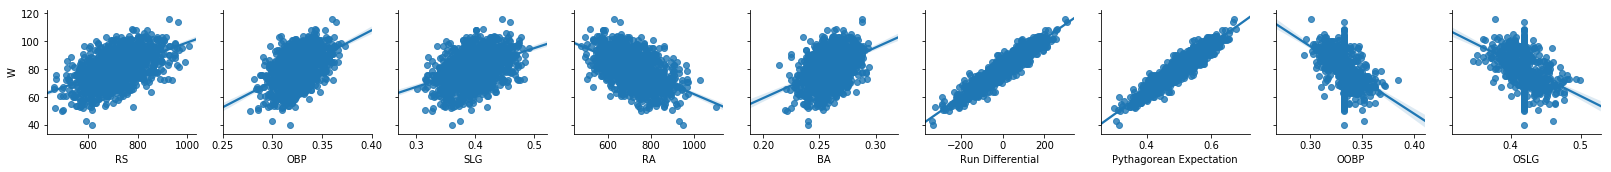

In [47]:
#plotting the relationship between specific features and wins
sns.pairplot(m, x_vars=['RS', 'OBP', 'SLG', 'RA', 'BA',
                        'Run Differential', 'Pythagorean Expectation', 'OOBP', 'OSLG'], 
             y_vars=['W'], kind="reg")


In [48]:
#calculating the correlation coefficient of specific features and wins and storing in a dataframe
m_corr = pd.DataFrame({
    
        'Feature':['Runs Scored', 'OBP', 'SLG', 'RA', 
                   'BA', 'Run Differential', 
                   'Pythagorean Expectation', 'OOBP', 'OSLG'], 
        'Correlation Coefficient': [m['RS'].corr(m['W']),
                                    m['OBP'].corr(m['W']), 
                                    m['SLG'].corr(m['W']), 
                                    m['RS'].corr(m['W']), 
                                    m['RA'].corr(m['W']), 
                                    m['Run Differential'].corr(m['W']),
                                    m['Pythagorean Expectation'].corr(m['W']),
                                    m['OOBP'].corr(m['W']),
                                    m['OSLG'].corr(m['W'])]
                  
                  })

m_corr = m_corr.sort_values(['Correlation Coefficient'], ascending=False)


m_corr

,Feature,Correlation Coefficient
6,Pythagorean Expectation,0.938997
5,Run Differential,0.937851
0,Runs Scored,0.511745
3,RA,0.511745
1,OBP,0.481836
2,SLG,0.401496
8,OSLG,-0.336993
7,OOBP,-0.376013
4,BA,-0.532394


# Model Training & Prediction
An essential part of predictive modeling is train/test split or some form of cross validation method in order to prevent (or attempt to at least) overfitting and underfitting of the model. This technique also allows for model fitting on a training set of the data that will make predictions on a testing set of the data. This testing set of the data is unseen data that the model is making predictions on. This is important as we want to build models that are accurate at predictiing, but more importantly models that are accurate at predicting on data that it has not seen yet.  

>__Overfitting__ <br>
Overfitting means that the model performs very well with the training set but poorly with the test set due to a capture of noise and patterns do not generalize well to unseen data.<br><br>
__Underfitting__<br>
Underfitting means that the model performs poorly with the training set and test set due to not capturing enough patterns in the data. 


The train/test split method creates a situation where the model is training on a set of data but predicting on unseen data in order to evaluate the true accuracy of the model. 

#### Train/Test Split

Here I use the train/test split method, where I split the data using an 80:20 ratio. 

I set the predictors(X) to the features run differential and pythagorean expectation and the response(Y) to wins. 

I print the shape of each set in order to ensure that the split was done efficiently. 

Then, I fit the linear regression model to the training sets, X_train and Y_train. The last step is to make predictions on the unseen data, X_test. 

__Links to Model Train/Test Split & Cross Validation__<br>
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6<br>
https://dziganto.github.io/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-Train-Test-Split/<br>
http://benalexkeen.com/splitting-data-for-machine-learning-with-scikit-learn/

In [49]:
X = m[[ 'Run Differential',
          'Pythagorean Expectation']]

Y = m['W']  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.20, random_state =0)


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(985, 2) (985,)
(247, 2) (247,)


In [63]:
lr = LinearRegression()
model = lr.fit(X_train, Y_train)
predictions = model.predict(X_test)


# Model Evaluation

It is not enough to develop a model to make predictions. One must evaluate the level of accuracy of the model. To test accuracy of the model, the model score, mean absolute error, mean squared error, and root mean squared error were analyzed. 

> __Mean absolute error, mean squared error, and root mean squared error are regression error metrics.__<br><br>
MAE is the easiest to understand, because it's the average error.<br>
MSE is more popular than MAE, because MSE "punishes" larger errors.<br>
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.<br>

Further, a linear line plot and residual plot are visualized for further analysis of the model predictions. 


#### Model Score
The model score is 0.9. This indicates that our model predicts team wins with 90% accuracy. 

#### Mean Absolute Error
The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average.

The model mean absolute error is 2.9. This low MAE indicates that the model is great at prediction. 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

#### Mean Squared Error
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The smaller the Mean Squared Error, the closer the fit is to the data.

The model mean squared error is 12.9. This indicates that the model is great at prediction.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

#### Root Mean Squared Error
RMSE indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Lower values of RMSE indicate better fit.


The model root mean squared error is 3.59. This indicates the model misses actual number of wins by about 3.59 games. 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

#### Linear Regression Equation
The linear regression equation of this model can be summed up as:
> Wins = 28.64 + 3.84084004e-02 x Runs Difference + 1.04309981e+02 x Pythagorean Expectation<br>
_There are no negative correlation coefficients, this is great! This means there is no indication of multicolinearity._

__Links to Model Evaluation Resources:__<br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/<br>
https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0<br>
https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/<br>
https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [64]:
print('Model Score:', model.score(X_test, Y_test))
print('Model Correlation Coefficient(s):', model.coef_)
print('Model Intercept:', model.intercept_)

 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Model Score: 0.9015207283755722
Model Correlation Coefficient(s): [3.84084004e-02 1.04309981e+02]
Model Intercept: 28.64716732898932
Mean Absolute Error: 2.90152304228289
Mean Squared Error: 12.936946970680557
Root Mean Squared Error: 3.5967967652733117


# Comparing Actual Wins and Predicted Wins

I wanted to see the actual win values against the predicted win values. 

The accuracy level indicates how far off from the actual win value the prediction was. 

In [65]:
y_pred  = model.predict(X_test)
comparison = pd.DataFrame({'Wins': Y_test, 
                            'Predictions': y_pred,
                          'Accuracy': Y_test - y_pred})

comparison.head()

,Wins,Predictions,Accuracy
18,95,94.785295,0.214705
342,93,88.396433,4.603567
467,88,87.774321,0.225679
851,73,78.948570,-5.948570
950,95,89.646628,5.353372


# Residual Plot

Residual plots allow for visualization of errors, whereby evaluation is dependent upon data randomly dispersed around the zero line. 


Here I plotted the residual plot using training, in blue, and test, in green, data. 

It appears that the residuals are for the most part randomly dispersed around the zero line. That is, they are generally symmetrically distributed, clustering towards the middle of the plot (the zero line). More specifically, they’re clustered around the lower single digits of the y-axis (-0.5 - 0.0 - 0.5).

Text(0, 0.5, 'Residuals')

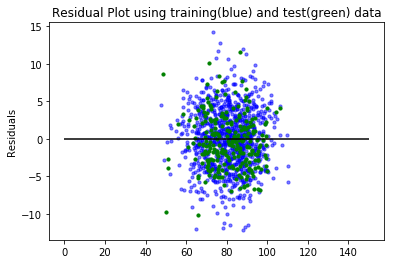

In [66]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b',
            s= 10, alpha = 0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g',
            s= 10)
plt.hlines(y = 0, xmin= 0, xmax = 150)
plt.title('Residual Plot using training(blue) and test(green) data')
plt.ylabel('Residuals')


# Recommendations

#### __Teams should use Run Differential and Pythagorean Expectation to evaluate a teams performance in a season or teams performance in game__


> #### __A runs scored to runs allowed ratio is a great indicator of a teams winning performance.__
 Teams ought to strive to keep runs scored high and runs allowed low in order to increase the number of games won in a season. That is, it is in a teams best interest to maintain a runs scored to runs allowed ratio that is in their favor, positive and high, in order to increase the likelihood of winning a game. 




# Future Project Updates

__Finalizing Project as Learning Guide for Linear Regression Modeling__<br>
As an aspiring data scientist, the most critical aspect of my journey has been self-learning through online resources. As an educator, I deeply value the importance of learning. My main goal in developing this project as a linear regression modeling guide is to provide a resource that is easy to follow, information, and linked to various resources I used throughout my learning journey.

The output of this project will be multi-fold:<br>
- Github repo with README documentation for further guidance
- Article post on Medium/Towards Data Science
- Youtube tutorial on linear regression modeling with Python

__Advanced Cross Validation Techniques__<br>

Cross Validation is crucial in a machine learning workflow in order to validate the stability of the machine learning model-how well it would generalize to new data.<br>  

Cross Validation is particularly useful in predictive models as it allows for one to estimate how accurately a the model will perform in practice. In order to limit issues such as overfitting and underfitting, cross-validation defines a data set to test the model in the training phase (i.e. validation data set). 

There are several cross-validation techniques. In this model, the simplest, train/test split, was used. For future modeling, I want to use more advanced cross-validation techniques, such as k-fold cross validation, to increase model accuracy. 

>__Advanced Cross-Validation Techniques__<br>
- K-fold
- Leave One Out
- Stratification

>__Links to Cross Validation Resources__<br>
https://towardsdatascience.com/cross-validation-70289113a072<br>
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

__Web Scraping__<br>
Currently, the data only contains baseball data up to 2012. In order to increase accuracy, I want to use BeautifulSoup to scrape baseball_reference.com to obtain runs scored and runs allowed data from 2013 until now. 

Web Scraping is extracting data from websites. In this case, I wish to scrape data from baseball_reference.com. In order to do so, I must become familiar with the HTML code on baseball_reference.com. This means inspecting the HTML code for tag location of data related to runs scored and runs allowed. Once I where our data is, I can start coding the web scraper and save it to a csv file for usage in the model by appending the new data to the current dataframe.

>__Links to Web Scraping Resources__<br>
http://econdataus.com/bref1.html<br>
http://www.agcross.com/2013/07/python-web-scraping-beautifulsoup/<br>
https://medium.freecodecamp.org/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe
